<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch03_04_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EB%8C%80%ED%91%9C%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.04. 기초통계 - 대표통계량
---
* 날짜:
* 이름:

## 학습내용
    - 최빈값
    - 중앙값
    - 산술 평균
    - 조화 평균
    - 절사 평균


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 대표 통계 - 수치자료형
---

### **| 데이터 생성**

```
# 아래 함수는 랜덤한 정수를 반환합니다.
np.random.randint(low, hight, shape)
# low = 최소값
# hight = 최대값
# shape = 추출할 데이터의 크기
```

* 최소값 1, 최대값 100인 데이터 1000개 생성하기

In [9]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.randint(1, 100, 1000)
# 판다스 시리즈 `s`로 바인딩
s = pd.Series(a)

* 데이터 분포 그리기

(array([113.,  88., 102., 113.,  87.,  94.,  91.,  99., 115.,  98.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

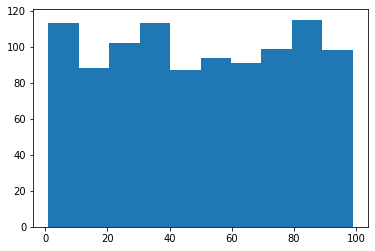

In [10]:
plt.hist(a)

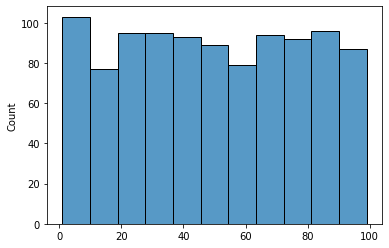

In [11]:
sns.histplot(s)

### **| 중앙값**
```
np.median(a)
s.median()
```

* 중앙값 계산

In [12]:
np.median(a), s.median()

(49.0, 49.0)

### **| 산술평균**

가장 보편적으로 사용되는 평균

\begin{align}
\mu = \frac{\sum^n_{i=1}x_i}{n}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

```
np.mean(a)
s.mean()
```

* 평균 계산

In [13]:
np.mean(a), s.mean()

(49.723, 49.723)

### **| 조화 평균**

비율 및 변화율에 등에 대한 평균을 계산할 때 사용

\begin{align}
\mu_{harmonic} = \frac{n}{\sum^n_{i=1}\frac{1}{x_i}}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

* 함수 `harmonic` 생성

In [14]:
def harmonic(x):
  n = len(x)
  return n/np.sum(1/x)

* 조화 평균 계산

In [15]:
harmonic(a)

16.869083648783032

### **| 절사 평균**

데이터에서 $\alpha$ 개를 제거한 후 평균을 내는 방법

\begin{align}
\mu_{cut}=\frac{\sum^{|n(1-\alpha)|}_{i=|n\alpha|} x_i}{ |n(1-\alpha)|-|n\alpha| }
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
 & \alpha : ?
\end{align}

```
from scipy.stats import trim_mean
trim_mean(x, alpha) 
```


* alpha 비율 0.1일 때 절사 평균 계산

In [16]:
from scipy.stats import trim_mean
trim_mean(a, 0.1) 

49.81125

## 대표 통계 - 범주자료형
---

### **| 데이터 생성**

```
# 아래 함수는 리스트 안의 요소를 랜덤하게 반환합니다.
np.random.choice(list, shape)
# list = 카테고리가 들어있는 리스트
# shape = 추출할 데이터의 크기
```

* `A, B, C` 세개의 카테고리에서 데이터 1000개 생성하기

In [37]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.choice(['A','B','C'], 1000)
# 판다스 시리즈 `s`로 바인딩
s = pd.Series(a)

* 데이터 분포 그리기

(array([337.,   0.,   0.,   0.,   0., 335.,   0.,   0.,   0., 328.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

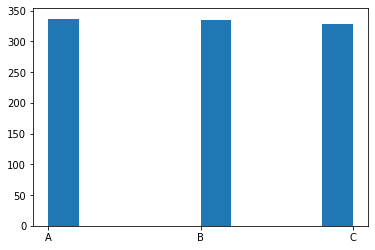

In [38]:
plt.hist(a)

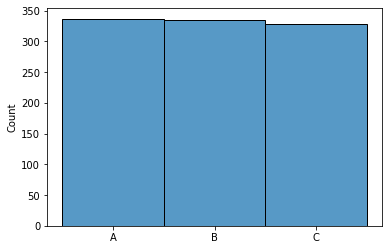

In [39]:
sns.histplot(s)

### **| 최빈값**

```
s.value_counts()

from scipy.stats import mode
mode(a)
```

* `value_counts()` 사용하기

In [40]:
s.value_counts()
val_most = s[0]
print(val_most)

A


* 사이파이 함수 `mode` 사용하기

In [41]:
from scipy.stats import mode
mode(a)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([337]))

## 예제
---

#### **예제 01**

1. 평균이 200만원이고 표준편차가 50만원인 정규분포를 따르는 데이터를 아래 넘파이 함수를 이용해 100개 생성하세요.
```
np.random.normal(mu, std, n)
```

2. 위에서 생성한 데이터의 히스토그램을 그리세요

3. 10억원의 소득을 가지는 데이터 한개를 위 데이터에 추가하세요.

4. 데이터의 히스토그램을 그리세요

5. 10억원의 소득을 추가하기 전과 후의 데이터의 산술평균을 비교하세요.

5. 10억원의 소득을 추가하기 전과 후의 데이터의 절사평균(alpha=0.1)을 비교하세요.

산술평균:  195.6456138875896 절사평균:  193.30573258007394


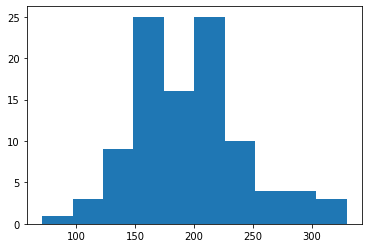

In [ ]:
p = np.random.normal(200, 50, 100)
plt.hist(p)
print('산술평균: ',np.mean(p), '절사평균: ',trim_mean(p, 0.1) )

산술평균:  1183.8075385025638 절사평균:  194.10083713494592


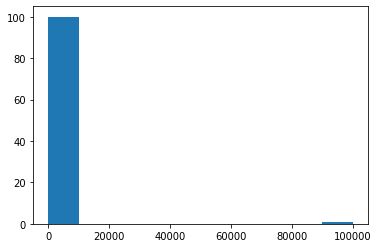

In [ ]:
p = np.append(p, 100000)
plt.hist(p)
print('산술평균: ',np.mean(p), '절사평균: ',trim_mean(p, 0.1) )

#### **예제 02**

타이타닉 데이터셋을 가져오고, 각 변수들의 대표값을 정리하세요.

In [ ]:
df = pd.read_csv('/content/train.csv')

In [3]:
df=df.dropna() # 결측치 제거

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [34]:
print('Age의 중앙값:', np.median(df.Age))
print('Age의 산술평균:', np.mean(df.Age))
print('Age의 조화평균:', harmonic(df.Age))
print('Age의 절사평균:', trim_mean(df.Age, 0.1))
from scipy.stats import mode
print('Age의 최빈값:', mode(df.Age))

Age의 중앙값: 36.0
Age의 산술평균: 35.6744262295082
Age의 조화평균: 17.932213596424305
Age의 절사평균: 35.704081632653065
Age의 최빈값: ModeResult(mode=array([36.]), count=array([11]))


In [36]:
print('Fare의 중앙값:', np.median(df.Fare))
print('Fare의 산술평균:', np.mean(df.Fare))
print('Fare의 조화평균:', harmonic(df.Fare))
print('Fare의 절사평균:', trim_mean(df.Fare, 0.1))
print('Fare의 최빈값:', mode(df.Fare))

Fare의 중앙값: 57.0
Fare의 산술평균: 78.68246885245901
Fare의 조화평균: 0.0
Fare의 절사평균: 64.76734761904761
Fare의 최빈값: ModeResult(mode=array([26.55]), count=array([7]))
